## BANK MARKETING CAMPAIGN - EDA

Data taken from : https://archive.ics.uci.edu/ml/datasets/bank+marketing

In this section we will try to find the pattern of the clients who're not deposited. This data related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

### FEATURE DESCRIPTIONS

*Bank client data*
- 1 - age (numeric)
- 2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") 
- 3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
- 4 - education (categorical: "unknown","secondary","primary","tertiary")
- 5 - default: has credit in default? (binary: "yes","no")
- 6 - balance: average yearly balance, in euros (numeric) 
- 7 - housing: has housing loan? (binary: "yes","no")
- 8 - loan: has personal loan? (binary: "yes","no")

*Related with the last contact of the current campaign:*
- 9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
- 10 - day: last contact day of the month (numeric)
- 11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
- 12 - duration: last contact duration, in seconds (numeric)

*Other attributes:*
- 13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- 14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
- 15 - previous: number of contacts performed before this campaign and for this client (numeric)
- 16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

*Output variable (desired target):*
- 17 - deposit - has the client subscribed a term deposit? (binary: 'yes','no')

### IMPORT LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as ss

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

### OVERVIEW

> First let's load the dataset and show it below.

In [2]:
df = pd.read_csv('bank.csv')

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [4]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no
11161,34,technician,married,secondary,no,0,no,no,cellular,9,jul,628,1,-1,0,unknown,no


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


> From the `.info()` above, we can see that this dataset are pretty much clean, as there are no Null values. Furthermore, the data types on each features are also quite right. I'll try to show it in the summary below.

In [6]:
pd.DataFrame({'Features' : df.columns, 'dataType' : df.dtypes.values, 
              'nullvalues' : [df[i].isna().sum() for i in df.columns],
              'unique' : [df[i].nunique() for i in df.columns],
              'uniqueSample' : [list(pd.Series(df[i].unique()).sample(2)) for i in df.columns]}).reset_index(drop = True)

,Features,dataType,nullvalues,unique,uniqueSample
0,age,int64,0,76,"[42, 44]"
1,job,object,0,12,"[technician, self-employed]"
2,marital,object,0,3,"[divorced, married]"
3,education,object,0,4,"[primary, secondary]"
4,default,object,0,2,"[no, yes]"
5,balance,int64,0,3805,"[175, 1393]"
6,housing,object,0,2,"[yes, no]"
7,loan,object,0,2,"[yes, no]"
8,contact,object,0,3,"[telephone, cellular]"
9,day,int64,0,31,"[19, 25]"


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,11162.0,41.231948,11.913369,18.0,32.0,39.0,49.00,95.0
balance,11162.0,1528.538524,3225.413326,-6847.0,122.0,550.0,1708.00,81204.0
day,11162.0,15.658036,8.420740,1.0,8.0,15.0,22.00,31.0
duration,11162.0,371.993818,347.128386,2.0,138.0,255.0,496.00,3881.0
campaign,11162.0,2.508421,2.722077,1.0,1.0,2.0,3.00,63.0
pdays,11162.0,51.330407,108.758282,-1.0,-1.0,-1.0,20.75,854.0
previous,11162.0,0.832557,2.292007,0.0,0.0,0.0,1.00,58.0


> The `.describe()` above, are the summary or the general information about the continous features on this data set, it contained information about mean, standard deviation, minimum values, maximum values as well as the quantiles. For example, on *age* feature, we can see that it have mean of 41.2, and std of 11.9 (let's round it up to 41 and 12, so we can infer it easily), we can say that the average *age* of client on this dataset are on 41 years old with variety between 29 years old (41-12) and 53 years old (41+12). Youngest client *age* is 18 years old, while the oldest is 95 years old. This is nothing but an example, the other features read pretty much the same. 

> Below are the general information of the categorical features in this dataset. **unique** represent the different category, **top** represent the category that appeared more, and **freq** are the frequency of the said category. For example, *job* feature, it having 12 different categories (job type) while the most are management, appeared by 2566 times.

In [8]:
df.describe(include = 'object').T

,count,unique,top,freq
job,11162,12,management,2566
marital,11162,3,married,6351
education,11162,4,secondary,5476
default,11162,2,no,10994
housing,11162,2,no,5881
loan,11162,2,no,9702
contact,11162,3,cellular,8042
month,11162,12,may,2824
poutcome,11162,4,unknown,8326
deposit,11162,2,no,5873


> Since this data are very much clean from null values, as well as the data types are already matches the definitions. Therefore, we're not going to do the preprocessing part. We will instead go to EDA process.

### EXPLORATORY DATA ANALYSIS

> I'll start the EDA process by examining the target features first, then split the data in two different categories following their respective the data types.

### TARGET FEATURES

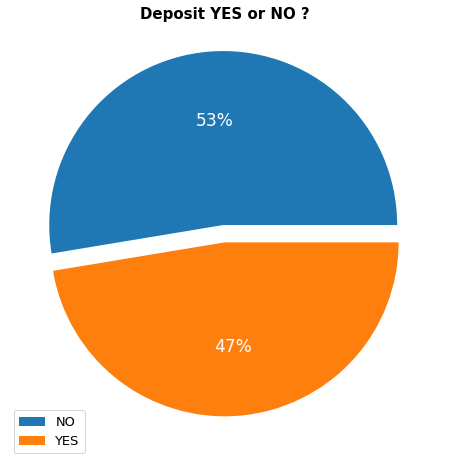

In [9]:
plt.figure(figsize = (12, 8))

plt.title('Deposit YES or NO ?', size = 15, fontweight = 'bold')

labels = 'NO', 'YES'

plt.pie(df['deposit'].value_counts(), autopct = '%.0f%%', 
        textprops = {'fontsize' : 17, 'color' : 'white'}, explode = (0.1,0))

plt.legend(labels, loc='lower left', fontsize = 13)

plt.show()

> We can see that there are 53% of the target are not deposited to the bank. While the rest of the target are successfully deposited to the bank. To further give inferrence to this matter, we'll explore each by splitting the data in two category as mentioned before.

In [10]:
df_cat = df.select_dtypes(['object'])
df_con = df.drop(columns = df_cat.columns)

In [11]:
df_cat.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
0,admin.,married,secondary,no,yes,no,unknown,may,unknown,yes
1,admin.,married,secondary,no,no,no,unknown,may,unknown,yes
2,technician,married,secondary,no,yes,no,unknown,may,unknown,yes
3,services,married,secondary,no,yes,no,unknown,may,unknown,yes
4,admin.,married,tertiary,no,no,no,unknown,may,unknown,yes


In [12]:
df_con.head()

,age,balance,day,duration,campaign,pdays,previous
0,59,2343,5,1042,1,-1,0
1,56,45,5,1467,1,-1,0
2,41,1270,5,1389,1,-1,0
3,55,2476,5,579,1,-1,0
4,54,184,5,673,2,-1,0


### NUMERICAL FEATURES

> Now first I'll examine the correlation between features on this category.

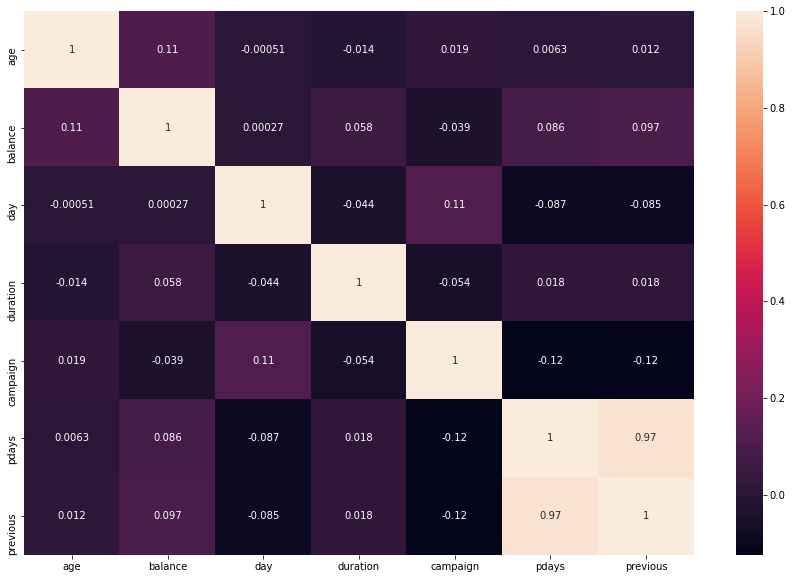

In [13]:
plt.figure(figsize = (15,10))
sns.heatmap(df_con.corr('spearman'), annot = True)

> From heatmap above, we can see that there seems no significant correlation apart from *pdays* and *previous* features. So we'll try to see the relationship between those two using `.pairplot()` below. This is also so we can see the relations between other features.

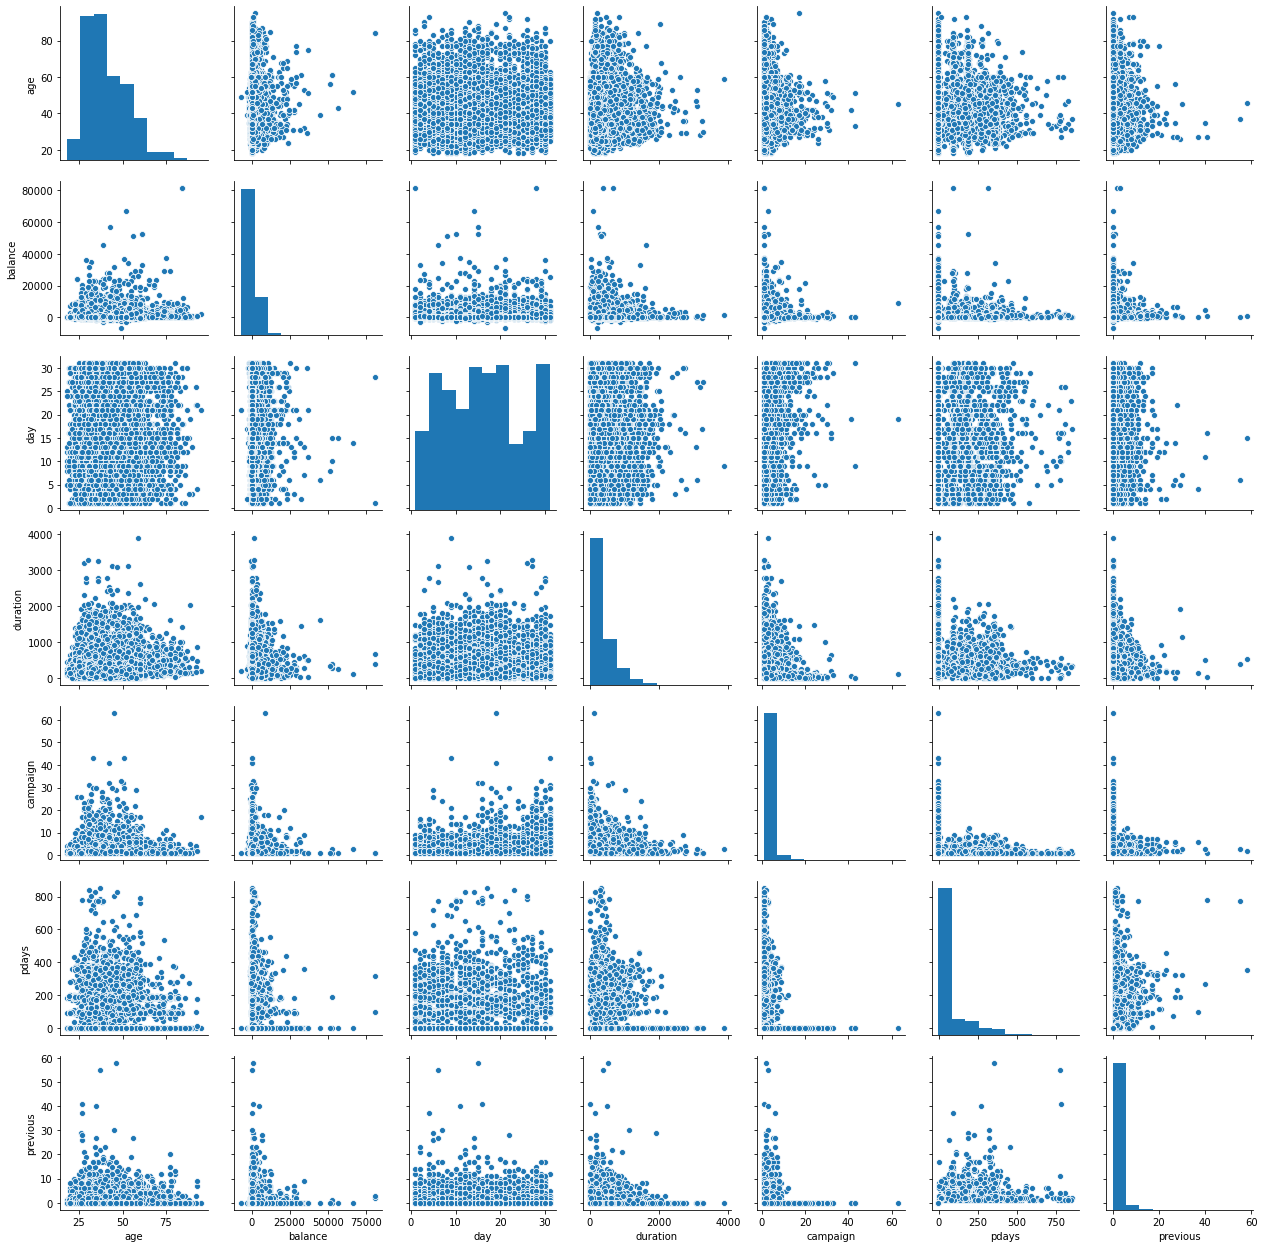

In [14]:
sns.pairplot(df_con)

> Although in heatmap before we can see that there are very significant correleation between *pdays* and *previous* features, but from above plot, we can see that the pattern of speading for each and every features data are not following linear relationship (both positive, and negative). This proves that correlation doesn't necessarily prove impact / influence. I'll show the plot below for easier view.

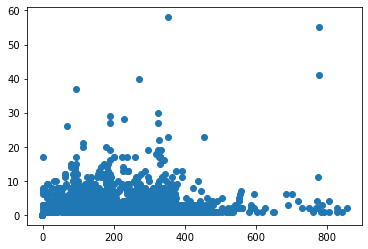

In [15]:
plt.scatter(df_con['pdays'], df_con['previous'])

> I'll show the distribution for each of the continous feature and draw some insight regarding this categories of data.

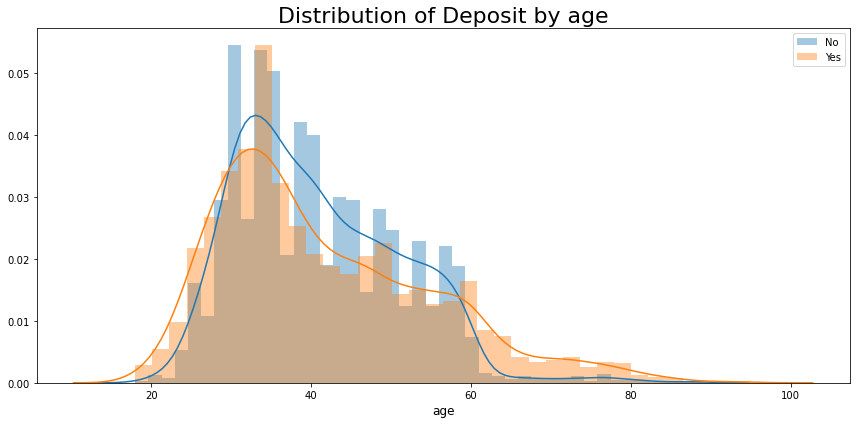

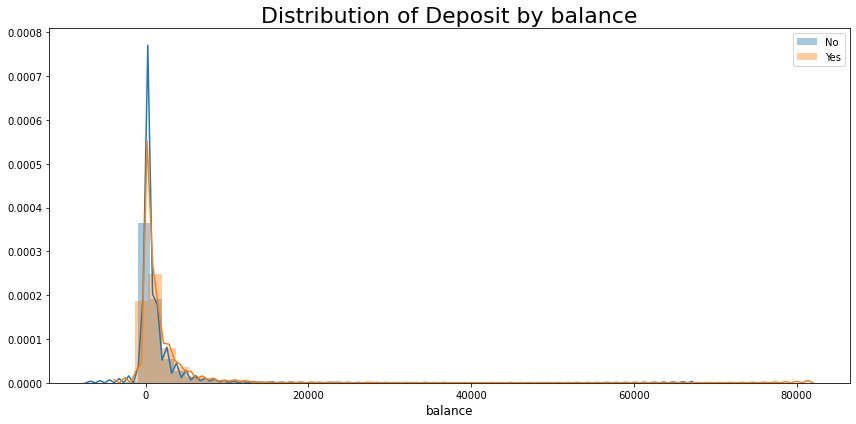

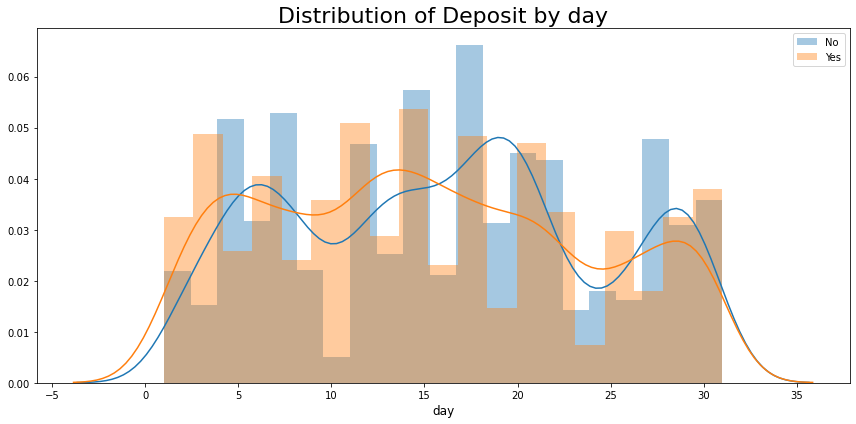

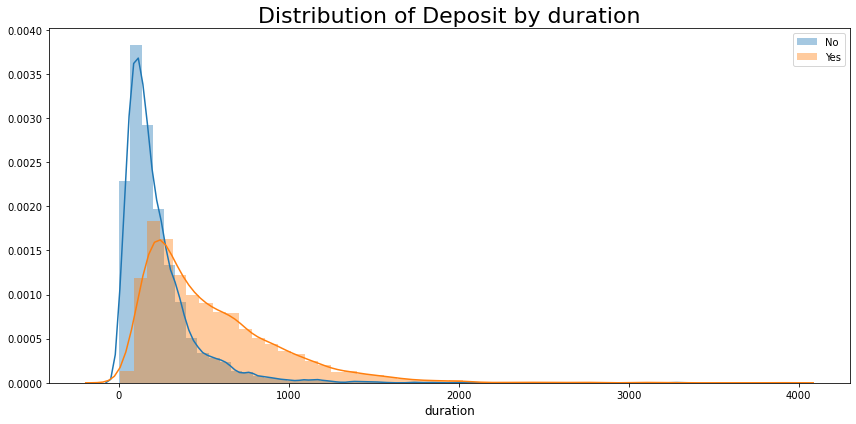

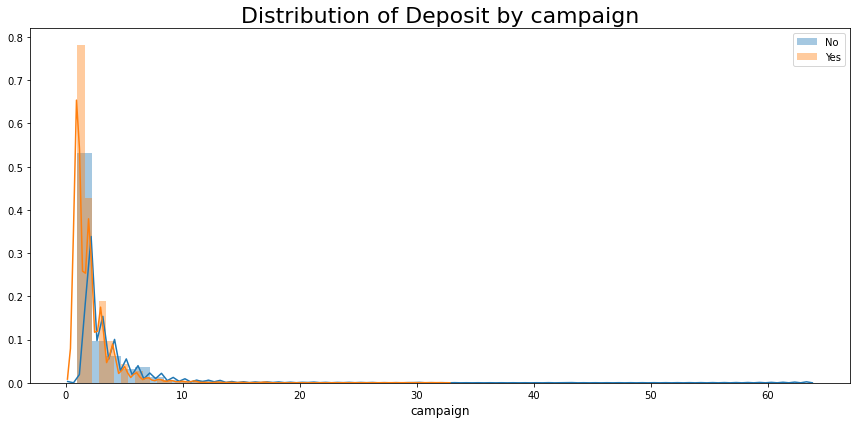

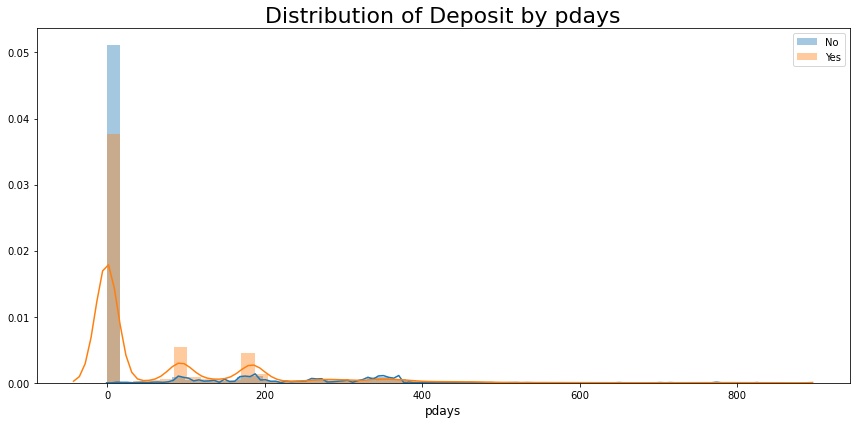

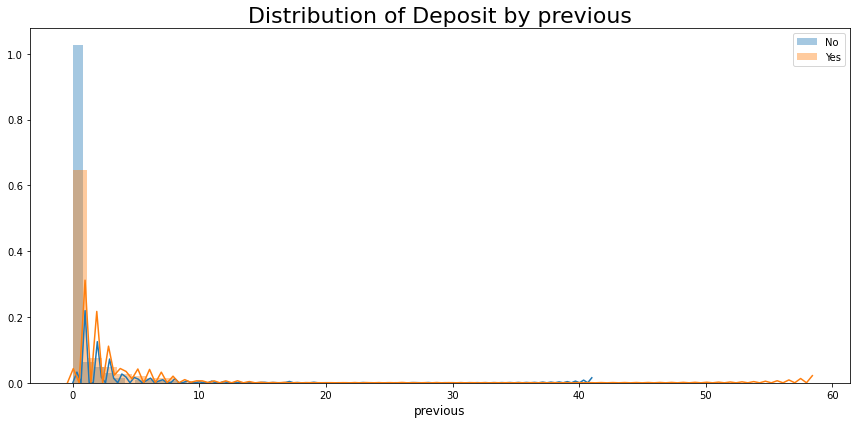

In [16]:
for i in df_con :
    plt.figure(figsize = (12,6))
    ax = sns.distplot(df[(df['deposit'] == 'no')][i])
    ax = sns.distplot(df[(df['deposit'] == 'yes')][i])
    
    ax.legend(['No', 'Yes'])
    
    plt.xlabel(i, fontsize = 12)
    plt.title('Distribution of Deposit by ' + i, fontsize = 22)
    
    plt.tight_layout()
    plt.show()

> We'll further explore detailed information on plot above :

> - First on *age* features. The client who are deposited and are not deposited are mostly varied between 30 to 35 years old. There are no significant differences between those categories except from it's distribution spread.

In [17]:
df_con['age'][df['deposit']=='yes'].value_counts().head()

32    221
30    217
33    210
35    209
31    206
Name: age, dtype: int64

In [18]:
df_con['age'][df['deposit']=='no'].value_counts().head()

31    290
34    268
32    256
33    254
35    252
Name: age, dtype: int64

> - The *balance* for both deposited and not deposited client are also pretty much the same, but we can see that the balance on some client deposited are having more then 200 in their balance, rather than on the not deposited clients they are mostly on 0 to 200.

In [19]:
df_con['balance'][df['deposit']=='yes'].value_counts().head(7)

0       292
1        17
2        16
5        15
294      12
3        12
2557     11
Name: balance, dtype: int64

In [20]:
df_con['balance'][df['deposit']=='no'].value_counts().head(7)

0     482
3      23
1      22
4      18
2      18
21     16
8      15
Name: balance, dtype: int64

> - The *day* features represent last contact day of the month, this means that the client that ended up deposited to this bank are varied but mostly are on 30th day after their last contact. On the other hand, the client that ended up not deposited to this bank are mostly contacted before 30 days. We can say that maybe we should've give them time and some privacy. And then start contacting again.

In [21]:
df_con['day'][df['deposit']=='yes'].value_counts().head()

30    271
12    244
13    241
15    238
4     230
Name: day, dtype: int64

In [22]:
df_con['day'][df['deposit']=='no'].value_counts().head()

20    378
18    320
28    267
6     266
19    262
Name: day, dtype: int64

> - The *duration* features represents the last contact duration (in seconds). We can see that the client that deposited on this bank are having *duration* more than 150 seconds, the other hand the client that are not deposited mostly having less than 150 seconds. This could also mean that they're not quite engaged or they're already decided their mind beforehand.

In [23]:
df_con['duration'][df['deposit']=='yes'].value_counts().head(7)

261    19
226    17
187    16
229    16
232    16
301    15
158    15
Name: duration, dtype: int64

In [24]:
df_con['duration'][df['deposit']=='no'].value_counts().head(7)

114    32
119    32
90     32
97     31
85     31
161    31
109    31
Name: duration, dtype: int64

> - On this *pdays* features, we see that although there are many values indicated that both the deposited or not deposited client are not contacted beforehand (-1), the values are much higher on the client that are not deposited. This indicated that maybe people tend to not deposited if they're not contacted before.

In [25]:
df_con['pdays'][df['deposit']=='yes'].value_counts().head(7)

-1      3384
 92       96
 182      80
 91       75
 181      74
 183      64
 184      46
Name: pdays, dtype: int64

In [26]:
df_con['pdays'][df['deposit']=='no'].value_counts().head(7)

-1      4940
 350      13
 175      12
 342      11
 189      10
 92       10
 370      10
Name: pdays, dtype: int64

> - The *previous* features, represents number of contacts performed before this campaign. Again, we see same pattern as in *pdays* feature before, therefore I think we need no further explanation on this as the insight are not much different from the *pdays* one.

In [27]:
df_con['previous'][df['deposit']=='yes'].value_counts().head(7)

0    3384
1     583
2     456
3     294
4     171
5     121
6      83
Name: previous, dtype: int64

In [28]:
df_con['previous'][df['deposit']=='no'].value_counts().head(7)

0    4940
1     304
2     237
3     141
4      73
5      44
6      34
Name: previous, dtype: int64

> I assume that's enough for this continous features. But before we proceed to next category, I think I need to adjust some values on *pdays* feature, as the (-1) values are somewhat confusing, I'll change this to (0) instead, as they still infer the same meaning.

In [29]:
df_con['pdays'] = df_con['pdays'].replace({-1 : 0})

In [30]:
df_con['pdays'].head()

0    0
1    0
2    0
3    0
4    0
Name: pdays, dtype: int64

### CATEGORICAL FEATURES

> I'll start this process by using the same method as before, examining the correlations. 

In [31]:
# cramers for categorical feature correlation

def cramersv(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [32]:
corr = []
for i in df_cat:
    matrix = []
    for j in df_cat:
        matrix.append(cramersv(df_cat[i], df_cat[j]))
    corr.append(matrix)

corr_cat = pd.DataFrame(corr, index = df_cat.columns, columns = df_cat.columns)

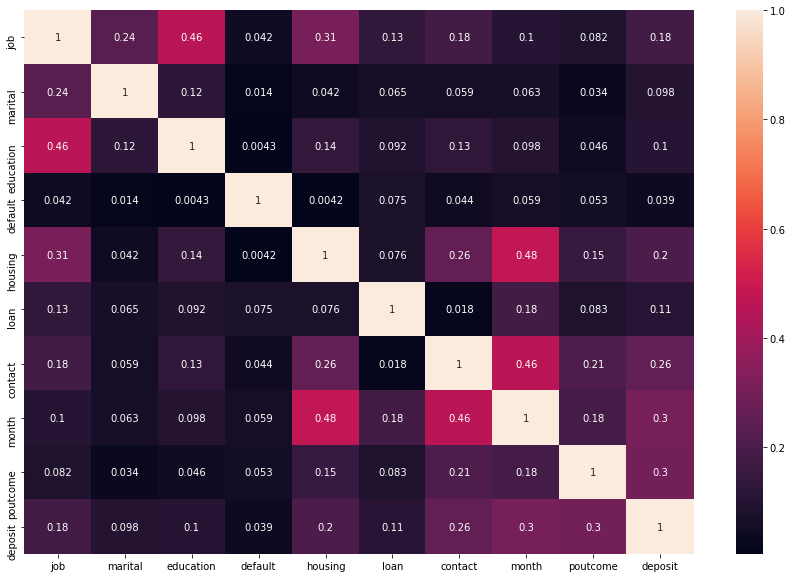

In [33]:
plt.figure(figsize = (15,10))
sns.heatmap(corr_cat, annot = True)

> We can see that from cramers'v heatmap above, it show some features that are correlated to each other. First, *education* and *job* features, next *housing* and *job*, next *housing* and *month*, lastly for *contact* and *month*. Although we can say that the correlation rather not significant, but for now, I'll show the relationship between these features using `pd.crosstab()` below.

In [34]:
pd.crosstab(df_cat['education'], df_cat['job'], normalize = 'columns')

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
education,,,,,,,,,,,,
primary,0.031484,0.356996,0.125000,0.525547,0.025721,0.356041,0.069136,0.089924,0.058333,0.022490,0.156863,0.100000
secondary,0.812594,0.574074,0.429878,0.284672,0.092751,0.403599,0.335802,0.808234,0.525000,0.663193,0.588235,0.214286
tertiary,0.125937,0.024691,0.402439,0.156934,0.848792,0.179949,0.567901,0.057421,0.230556,0.285793,0.235294,0.128571
unknown,0.029985,0.044239,0.042683,0.032847,0.032736,0.060411,0.027160,0.044420,0.186111,0.028524,0.019608,0.557143


> I think the cross tabulation are pretty self explanatory, for example we can infer from above data that the client who are having job as an **admin** 81% are from secondary education level. While **management** are 84% from tertiary education level. And so on.

In [35]:
pd.crosstab(df_cat['housing'], df_cat['job'], normalize = 'columns')

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
housing,,,,,,,,,,,,
no,0.445277,0.320473,0.493902,0.722628,0.581839,0.841902,0.57037,0.386782,0.858333,0.519473,0.686275,0.957143
yes,0.554723,0.679527,0.506098,0.277372,0.418161,0.158098,0.42963,0.613218,0.141667,0.480527,0.313725,0.042857


In [36]:
pd.crosstab(df_cat['housing'], df_cat['month'], normalize = 'columns')

month,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
housing,,,,,,,,,,,,
no,0.482124,0.816327,0.818182,0.675258,0.764535,0.559445,0.635025,0.775362,0.160411,0.504772,0.77551,0.780564
yes,0.517876,0.183673,0.181818,0.324742,0.235465,0.440555,0.364975,0.224638,0.839589,0.495228,0.22449,0.219436


In [37]:
pd.crosstab(df_cat['contact'], df_cat['month'], normalize = 'columns')

month,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
contact,,,,,,,,,,,,
cellular,0.928494,0.955234,0.818182,0.893041,0.886628,0.849406,0.313421,0.894928,0.463881,0.888653,0.778061,0.868339
telephone,0.066089,0.036208,0.172727,0.100515,0.110465,0.122853,0.022095,0.090580,0.035411,0.093319,0.168367,0.097179
unknown,0.005417,0.008558,0.009091,0.006443,0.002907,0.027741,0.664484,0.014493,0.500708,0.018028,0.053571,0.034483


> It appears that we've already got so much insight from above information alone. But we'll further explore the data using `countplot()` below to gain more insight.

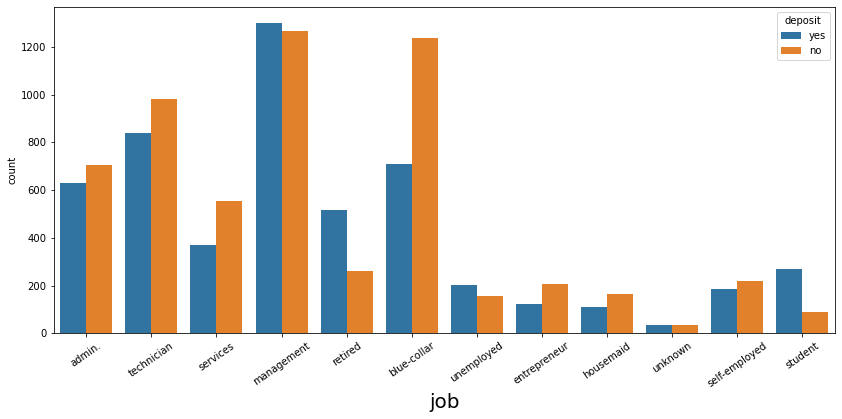

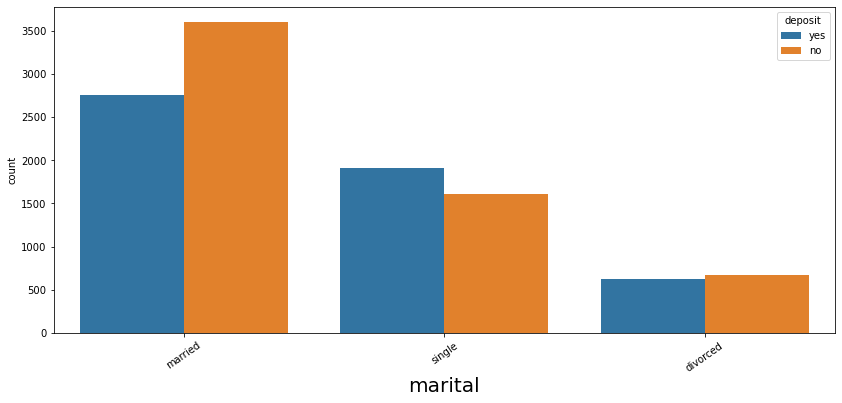

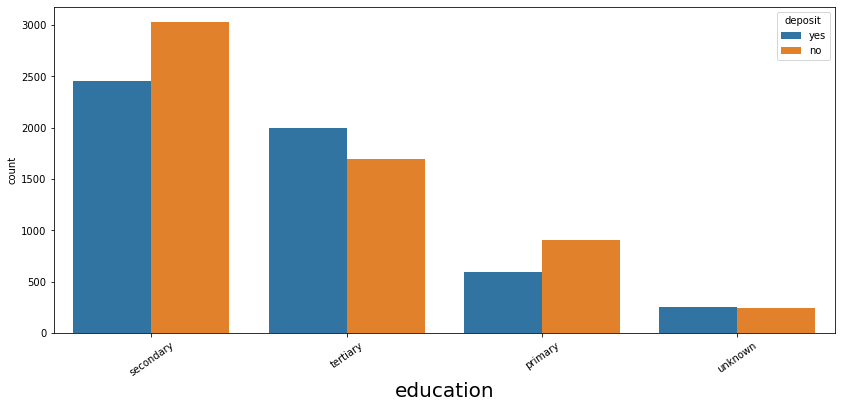

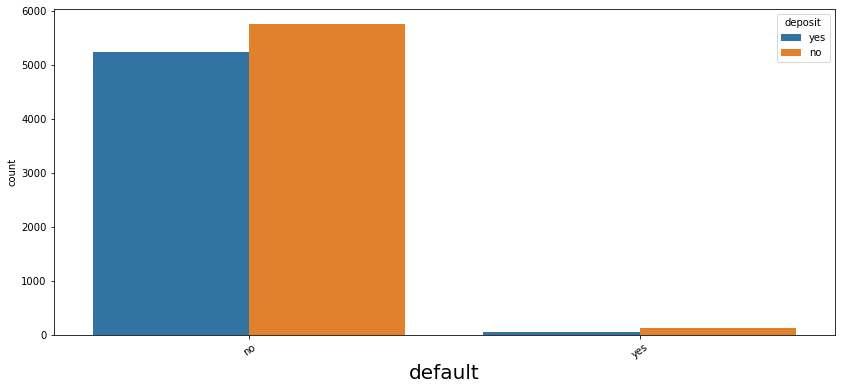

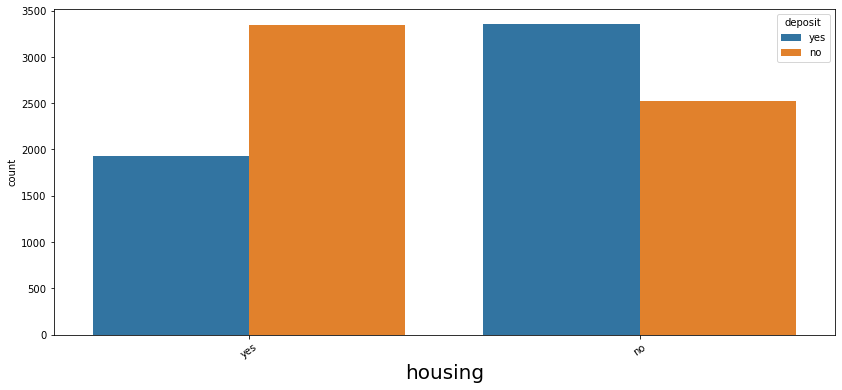

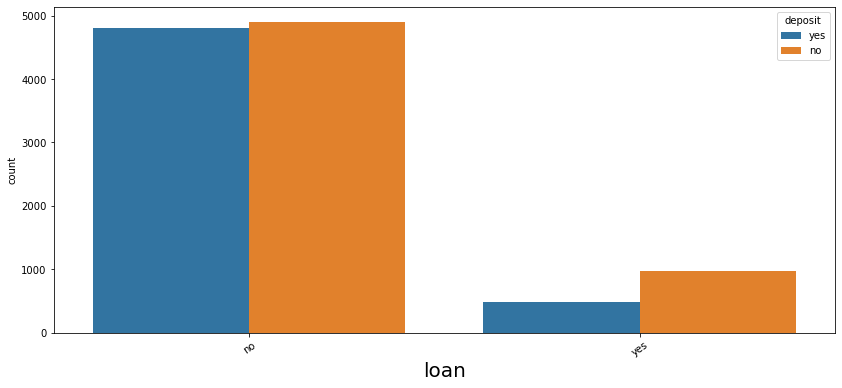

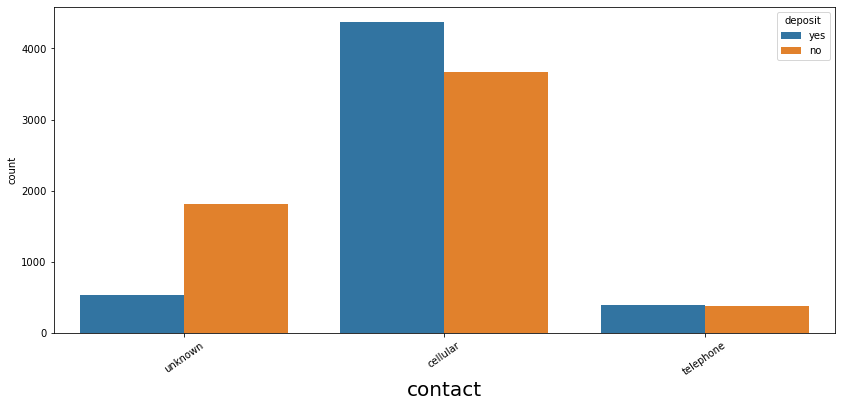

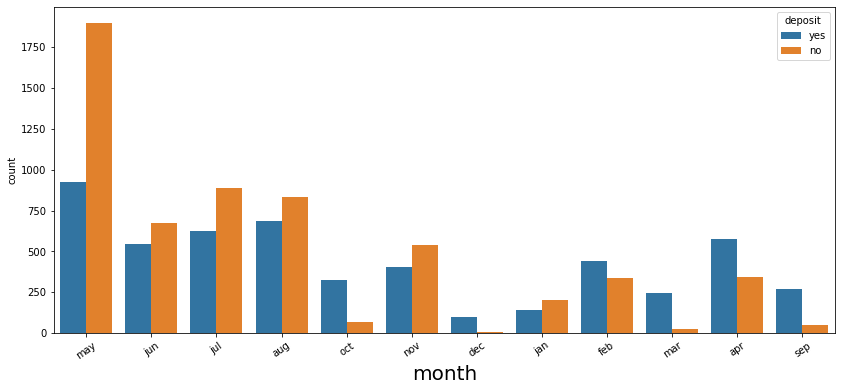

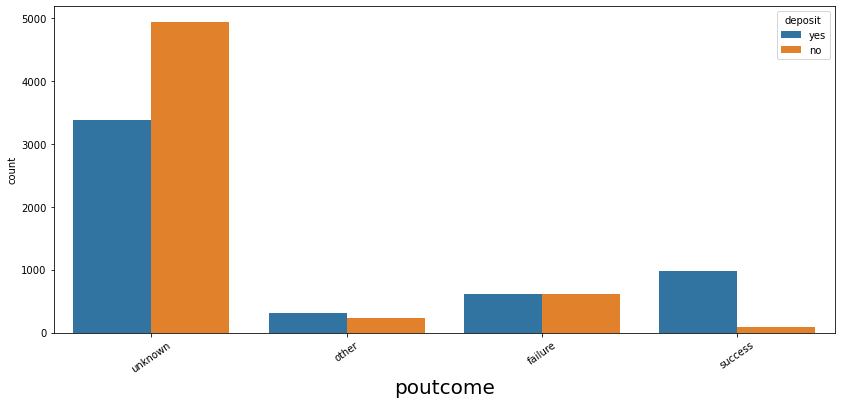

In [38]:
for i in df_cat.drop(columns = 'deposit'):
    plt.figure(figsize = (14,6))
    ax = sns.countplot(x = i, data = df_cat, hue = 'deposit')
    plt.xlabel(i, fontsize = 20)
    plt.xticks(rotation=35)
    plt.tight_layout
    plt.show()

> From plot above, we can infer that although the previous outcome from the campaign was dominated by the unknown category, but at least we got the pattern for the client who are not deposited :
- They're mainly dominated by management and blue-collar worker.
- Already married and from secondary education level.
- Has a housing loan and personal loan.
- Contacted by cellular phone.
- Mostly are not deposited on May.  

> More detailed information below :

In [39]:
# job

df_cat.groupby('deposit')['job'].value_counts()

deposit  job          
no       management       1265
         blue-collar      1236
         technician        983
         admin.            703
         services          554
         retired           262
         self-employed     218
         entrepreneur      205
         housemaid         165
         unemployed        155
         student            91
         unknown            36
yes      management       1301
         technician        840
         blue-collar       708
         admin.            631
         retired           516
         services          369
         student           269
         unemployed        202
         self-employed     187
         entrepreneur      123
         housemaid         109
         unknown            34
Name: job, dtype: int64

In [40]:
#  marital

df_cat.groupby('deposit')['marital'].value_counts()

deposit  marital 
no       married     3596
         single      1606
         divorced     671
yes      married     2755
         single      1912
         divorced     622
Name: marital, dtype: int64

In [41]:
# education

df_cat.groupby('deposit')['education'].value_counts()

deposit  education
no       secondary    3026
         tertiary     1693
         primary       909
         unknown       245
yes      secondary    2450
         tertiary     1996
         primary       591
         unknown       252
Name: education, dtype: int64

In [42]:
# housing

df_cat.groupby('deposit')['housing'].value_counts()

deposit  housing
no       yes        3346
         no         2527
yes      no         3354
         yes        1935
Name: housing, dtype: int64

In [43]:
# loan

df_cat.groupby('deposit')['loan'].value_counts()

deposit  loan
no       no      4897
         yes      976
yes      no      4805
         yes      484
Name: loan, dtype: int64

In [44]:
# contact

df_cat.groupby('deposit')['contact'].value_counts()

deposit  contact  
no       cellular     3673
         unknown      1816
         telephone     384
yes      cellular     4369
         unknown       530
         telephone     390
Name: contact, dtype: int64

In [45]:
# month

df_cat.groupby('deposit')['month'].value_counts()

deposit  month
no       may      1899
         jul       887
         aug       831
         jun       676
         nov       540
         apr       346
         feb       335
         jan       202
         oct        69
         sep        50
         mar        28
         dec        10
yes      may       925
         aug       688
         jul       627
         apr       577
         jun       546
         feb       441
         nov       403
         oct       323
         sep       269
         mar       248
         jan       142
         dec       100
Name: month, dtype: int64

### SUMMARY

> To sum up the pattern, we can safely infer that the clients who most likely **not to deposited** are mostly contacted on May, having less than 150 seconds of contact, most contact are conducted by cellular phone. Their job categories are either from management or blue-collar. They're already married, having secondary educational level, and most of them are on 30 to 35 years old, having balance between 0 to 200 euros. Furthermore, they tend to have a personal loan or a house loan.

> That being said, I'll drop the cleaned data to another csv using `.to_csv()` so that we can use the cleaned data for Machine Learning purpose.

In [46]:
df_ready = pd.concat([df_con, df_cat], axis = 1)

In [47]:
df_ready.head()

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
0,59,2343,5,1042,1,0,0,admin.,married,secondary,no,yes,no,unknown,may,unknown,yes
1,56,45,5,1467,1,0,0,admin.,married,secondary,no,no,no,unknown,may,unknown,yes
2,41,1270,5,1389,1,0,0,technician,married,secondary,no,yes,no,unknown,may,unknown,yes
3,55,2476,5,579,1,0,0,services,married,secondary,no,yes,no,unknown,may,unknown,yes
4,54,184,5,673,2,0,0,admin.,married,tertiary,no,no,no,unknown,may,unknown,yes


In [48]:
df_ready.to_csv('bank_ready.csv', index = False)